## **2. Load the data set**

In [ ]:
!pip install rdkit
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import rdkit
from rdkit import Chem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 37.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('Molecules.csv')
df

,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,0,...,0.000,0,H3N,0,0,0,1,17.03052547,0.000000,0
1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,...,1.422,60,C9H8O4,0,0,0,13,180.1577688,0.047619,3
2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,1,...,0.418,2,C2H2,0,0,0,2,26.0373533,0.000000,0
3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476,0.106383,8
4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406463,0.162791,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Row4994,[Na+].O=C1N=C([O-])NC(C1(CCCCCC)CC)=O,C12H19N2O3Na,2.12,61.995067,0,0,37,25.624933,17,...,3.367,80,C12H19N2NaO3,0,1,-1,18,262.2810956,0.243243,6
4995,Row4995,O=C1NC(=O)C(C(C)C)(CC)C(N1)=O,C9H14N2O3,1.90,29.781102,0,0,28,19.498898,14,...,0.941,70,C9H14N2O3,0,0,0,14,198.2194148,0.214286,2
4996,Row4996,O=C1NC(=O)C(CC=C)(CC(O)C)C(N1)=O,C10H14N2O4,1.90,32.343102,0,0,30,19.498898,16,...,-0.247,78,C10H14N2O4,0,0,0,16,226.2295556,0.166667,4
4997,Row4997,s1[nH]c(=O)c2c1cccc2,C7H5NOS,1.90,20.455965,9,10,15,9.364035,11,...,1.673,52,C7H5NOS,0,0,0,10,151.1870482,0.000000,0


In [ ]:
df1 = df[df.Molecule.notna()]


df1

,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,0,...,0.000,0,H3N,0,0,0,1,17.03052547,0.000000,0
1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,...,1.422,60,C9H8O4,0,0,0,13,180.1577688,0.047619,3
2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,1,...,0.418,2,C2H2,0,0,0,2,26.0373533,0.000000,0
3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476,0.106383,8
4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406463,0.162791,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Row4994,[Na+].O=C1N=C([O-])NC(C1(CCCCCC)CC)=O,C12H19N2O3Na,2.12,61.995067,0,0,37,25.624933,17,...,3.367,80,C12H19N2NaO3,0,1,-1,18,262.2810956,0.243243,6
4995,Row4995,O=C1NC(=O)C(C(C)C)(CC)C(N1)=O,C9H14N2O3,1.90,29.781102,0,0,28,19.498898,14,...,0.941,70,C9H14N2O3,0,0,0,14,198.2194148,0.214286,2
4996,Row4996,O=C1NC(=O)C(CC=C)(CC(O)C)C(N1)=O,C10H14N2O4,1.90,32.343102,0,0,30,19.498898,16,...,-0.247,78,C10H14N2O4,0,0,0,16,226.2295556,0.166667,4
4997,Row4997,s1[nH]c(=O)c2c1cccc2,C7H5NOS,1.90,20.455965,9,10,15,9.364035,11,...,1.673,52,C7H5NOS,0,0,0,10,151.1870482,0.000000,0


In [ ]:
len(df1.Molecule.unique())

4983

In [ ]:
df1_nr = df1.drop_duplicates(['Molecule'])
df1_nr

,row ID,Molecule,Molecule name,Mannhold LogP,Atomic Polarizabilities,Aromatic Atoms Count,Aromatic Bonds Count,Element Count,Bond Polarizabilities,Bond Count,...,XLogP,Zagreb Index,Molecular Formula,Formal Charge,Formal Charge (pos),Formal Charge (neg),Heavy Atoms Count,Molar Mass,SP3 Character,Rotatable Bonds Count (non terminal)
0,Row0,N,H3N,1.35,3.100379,0,0,4,1.299621,0,...,0.000,0,H3N,0,0,0,1,17.03052547,0.000000,0
1,Row1,O=C(O)c1c(OC(=O)C)cccc1,C9H8O4,2.01,24.382344,6,6,21,12.577656,13,...,1.422,60,C9H8O4,0,0,0,13,180.1577688,0.047619,3
2,Row2,C#C,C2H2,1.68,4.853586,0,0,4,2.186414,1,...,0.418,2,C2H2,0,0,0,2,26.0373533,0.000000,0
3,Row3,P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)...,C10H16N5O13P3,0.25,55.084688,9,10,47,55.749312,33,...,-5.533,170,C10H16N5O13P3,0,0,0,31,507.181476,0.106383,8
4,Row4,S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c...,C16H19N3O4S,2.34,50.237067,6,6,43,27.904933,26,...,-1.732,132,C16H19N3O4S,0,0,0,24,349.406463,0.162791,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Row4994,[Na+].O=C1N=C([O-])NC(C1(CCCCCC)CC)=O,C12H19N2O3Na,2.12,61.995067,0,0,37,25.624933,17,...,3.367,80,C12H19N2NaO3,0,1,-1,18,262.2810956,0.243243,6
4995,Row4995,O=C1NC(=O)C(C(C)C)(CC)C(N1)=O,C9H14N2O3,1.90,29.781102,0,0,28,19.498898,14,...,0.941,70,C9H14N2O3,0,0,0,14,198.2194148,0.214286,2
4996,Row4996,O=C1NC(=O)C(CC=C)(CC(O)C)C(N1)=O,C10H14N2O4,1.90,32.343102,0,0,30,19.498898,16,...,-0.247,78,C10H14N2O4,0,0,0,16,226.2295556,0.166667,4
4997,Row4997,s1[nH]c(=O)c2c1cccc2,C7H5NOS,1.90,20.455965,9,10,15,9.364035,11,...,1.673,52,C7H5NOS,0,0,0,10,151.1870482,0.000000,0


In [ ]:
selection = ['Molecule','Molecule name']
df3 = df1_nr[selection]
df3.to_csv('data_raw.csv', index=False)

In [ ]:
import pandas as pd
from rdkit import Chem

# Load the Excel file
df = pd.read_csv('data_raw.csv')

# Filter out rows with incomplete SMILES strings in the 'smiles_column' column
smiles_column = 'Molecule'
rows_to_keep = []
for i, row in df.iterrows():
    Molecule = row[smiles_column]
    mol = Chem.MolFromSmiles(Molecule, sanitize=False)
    if mol is not None:
        rows_to_keep.append(i)
df_filtered = df.iloc[rows_to_keep]

# Save the filtered data to a new Excel file
df_filtered.to_excel('output_file.xlsx', index=False)

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-09-13 09:29:41--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-09-13 09:29:42--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  53.4MB/s    in 0.5s    

2023-09-13 09:29:44 (53.4 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-09-13 09:29:44--  https://git

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
selection = ['Molecule','Molecule name']
df_selection = df_filtered[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi

N	H3N
O=C(O)c1c(OC(=O)C)cccc1	C9H8O4
C#C	C2H2
P(=O)(OP(=O)(OC[C@H]1O[C@@H](n2c3ncnc(c3nc2)N)[C@@H]([C@@H]1O)O)O)(OP(=O)(O)O)O	C10H16N5O13P3
S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c3ccccc3)C2=O)(C)C	C16H19N3O4S
O=C1O[C@H]([C@@H](O)CO)C(=C1O)O	C6H8O6
O=C1OC([C@@H](O)CO)C(=C1O)O	C6H8O6
NC(Cc1ccccc1)C	C9H13N
O=C(OC)[C@@H](NC(=O)[C@@H](N)CC(=O)O)Cc1ccccc1	C14H18N2O5
S1C([C@H](C(=O)O)N2[C@H]1[C@H](NC(=O)[C@H](N)c3ccc(O)cc3)C2=O)(C)C	C16H19N3O5S
O=NOCCCCC	C5H11NO2
O1[C@@H](O[C@@H](C#N)c2ccccc2)[C@H](O)[C@@H](O)[C@@H]([C@H]1CO[C@@H]3O[C@@H]([C@@H](O)[C@@H]([C@H]3O)O)CO)O	C20H27NO11
O1[C@@H](OC(C#N)c2ccccc2)[C@H](O)[C@@H](O)[C@@H]([C@H]1CO[C@@H]3O[C@@H]([C@@H](O)[C@@H]([C@H]3O)O)CO)O	C20H27NO11
N#B	NB
O=C(O)[O-]	CHO3
O=C(O)c1ccccc1	C7H6O2
O=C=O	CO2
N#[C-]	CN
O=C([O-])[O-]	CO3
O=c1nccc([nH]1)N	C4H5N3O
[O+]#[C-]	CO
ClC(Cl)C(=O)N[C@@H]([C@H](O)c1ccc([N+](=O)[O-])cc1)CO	C11H12N2O5Cl2
O[C@@H]1CC2=CC[C@H]3[C@H]4[C@]([C@@H]([C@@H](CCCC(C)C)C)CC4)(C)CC[C@@H]3[C@@]2(C)CC1	C27H46O
Fc1c(N2CCNCC2)cc3

In [ ]:
! cat molecule.smi | wc -l

4983


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CH4O in molecule.smi (57/4983). Average speed: 0.33 s/mol.
Processing C17H19NO3 in molecule.smi (58/4983). Average speed: 0.33 s/mol.
Processing C15H15NO2S in molecule.smi (59/4983). Average speed: 0.33 s/mol.
Processing C21H27NO in molecule.smi (60/4983). Average speed: 0.32 s/mol.
Processing NO3 in molecule.smi (61/4983). Average speed: 0.32 s/mol.
Processing C3H5N3O9 in molecule.smi (62/4983). Average speed: 0.32 s/mol.
Processing HNO3 in molecule.smi (63/4983). Average speed: 0.31 s/mol.
Processing C6H6N2O in molecule.smi (64/4983). Average speed: 0.31 s/mol.
Processing NO2 in molecule.smi (65/4983). Average speed: 0.31 s/mol.
Processing O3 in molecule.smi (66/4983). Average speed: 0.30 s/mol.
Processing O3 in molecule.smi (67/4983). Average speed: 0.30 s/mol.
Processing C18H21NO4 in molecule.smi (68/4983). Average speed: 0.29 s/mol.
Processing C3H8 in molecule.smi (69/4983). Average speed: 0.29 s/mol.
Processing C5H4N4 

In [ ]:
! ls -l

total 57172
-rw-r--r-- 1 root root   879386 Sep 13 07:19 data_raw.csv
-rw-r--r-- 1 root root 26777249 Sep 13 08:16 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Sep 13 07:20 __MACOSX
-rw-r--r-- 1 root root  3758683 Sep 13 07:13 Molecules.csv
-rw-r--r-- 1 root root   879363 Sep 13 07:21 molecule.smi
-rw-r--r-- 1 root root   451342 Sep 13 07:20 output_file.xlsx
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 Sep 13 07:20 padel.sh
-rw-r--r-- 1 root root 25768637 Sep 13 07:20 padel.zip
drwxr-xr-x 1 root root     4096 Sep 11 13:22 sample_data


In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,H3N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C2H2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C9H8O4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C10H16N5O13P3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C6H8O6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,C22H28O4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15093,C7H15NO5S,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15094,H4As,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15095,C22H25N6O8P,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

X= df_X.drop(columns=['Name'])
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3121,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3122,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

### **3.2. Output features**

In [ ]:
Y = df_filtered.BINARY_VALUE
Y

0       1
1       1
2       0
3       1
4       1
       ..
3120    0
3121    0
3122    0
3123    1
3124    1
Name: BINARY_VALUE, Length: 3125, dtype: int64

In [ ]:


# count the values in column A
counts = df_filtered['BINARY_VALUE'].value_counts()

# print the counts
print(counts)


1    1847
0    1278
Name: BINARY_VALUE, dtype: int64


### **3.3. Let's examine the data dimension**

In [ ]:
X.shape

(3125, 881)

In [ ]:
Y.shape

(3125,)

In [ ]:
import numpy as np

unique_labels, label_counts = np.unique(Y, return_counts=True)
print("Label distribution:")
for label, count in zip(unique_labels, label_counts):
    print("Label {}: {} instances".format(label, count))


Label distribution:
Label 0: 1278 instances
Label 1: 1847 instances


In [ ]:

!pip install xgboost
#!pip install lightgbm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=10)

# Train the XGBoost classifier on the training set
xgb_classifier.fit(X_train, Y_train)

# Use the trained XGBoost classifier to predict labels for the test set
Y_predict = xgb_classifier.predict(X_test)
def cross_val(classifier, num_splits=1000):
    model = classifier
    scores = cross_val_score(model, X, Y, cv=num_splits)
    print(np.round(scores, 2))
    print(scores.mean())

cross_val(XGBClassifier(n_estimators=10))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[0.75 0.5  0.25 0.75 1.   0.5  0.75 0.5  0.   0.25 1.   1.   0.75 1.
 1.   0.75 0.5  0.75 0.75 0.5  0.25 0.25 0.75 0.5  0.75 0.75 0.75 0.5
 0.5  0.75 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 0.75 1.   0.5  0.75 1.   0.5  0.5  0.75 0.5  0.75 0.5  0.5  0.5  0.5
 0.5  0.5  0.75 0.5  0.5  0.5  0.   0.   0.5  1.   0.75 1.   0.75 1.
 1.   0.75 0.25 1.   0.75 0.5  0.   0.75 1.   1.   0.75 0.5  1.   1.
 0.75 0.75 1.   1.   1.   1.   0.75 1.   1.   1.   1.   1.   1.   0.75
 1.   0.75 1.   0.75 1.   1.   1.   1.   1.   0.75 0.75 1.   1.   0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.5  0.75 0.75 0.75 0.75 0.75 1.
 1.   1.   0.33 1.   0.33 0.33 0.67 0.67 1.   0.67 0.67 0.67 0.67 1.
 1.   0.67 1.   1.   1.   1.   1.   1.   0.33 0.33 0.33 0.33 0.67 0.67
 0.67 1.   0.67 0.67 0.33 0.33 0.67 0.33 0.   0.67 0.67 0.   0.33 0.33
 0.33 0.67 0.   0.33 1.   1.   0.67 1.   1.   1.   1.   0.67 1.

In [ ]:
# Calculate sequence lengths of training data
sequence_lengths_train = [len(sequence.split()) for sequence in X_train]

# Calculate statistics
count_train = len(sequence_lengths_train)
mean_train = np.mean(sequence_lengths_train)
std_train = np.std(sequence_lengths_train)
minimum_train = np.min(sequence_lengths_train)
percentiles_train = np.percentile(sequence_lengths_train, [25, 50, 75])
maximum_train = np.max(sequence_lengths_train)

# Print the statistics
print("Training Data Sequence Length Distribution:")
print("Count:", count_train)
print("Mean:", mean_train)
print("Standard Deviation:", std_train)
print("Minimum:", minimum_train)
print("25th Percentile:", percentiles_train[0])
print("50th Percentile (Median):", percentiles_train[1])
print("75th Percentile:", percentiles_train[2])
print("Maximum:", maximum_train)



Training Data Sequence Length Distribution:
Count: 881
Mean: 1.0
Standard Deviation: 0.0
Minimum: 1
25th Percentile: 1.0
50th Percentile (Median): 1.0
75th Percentile: 1.0
Maximum: 1


In [ ]:
from sklearn.metrics import recall_score

# Assuming you have predicted labels from your model stored in y_pred
# and true labels stored in y_true

# Calculate recall score
recall = recall_score(Y_test, Y_predict)

# Print recall score
print("Recall:", recall)


Recall: 0.8447368421052631


In [ ]:
from sklearn.metrics import precision_score

# y_true is the true binary labels, y_pred is the predicted binary labels
precision = precision_score(Y_test, Y_predict)
print(f"Precision score: {precision}")


Precision score: 0.7697841726618705


In [ ]:
from sklearn.metrics import f1_score

# Assuming you have predicted labels from your model stored in y_pred
# and true labels stored in y_true

# Calculate F1-score
f1score = f1_score(Y_test, Y_predict)

# Print F1-score
print(f"F1-score: {f1score}")


F1-score: 0.8055207026348807


In [ ]:
from sklearn.metrics import roc_auc_score

# y_true is the true binary labels, y_pred_prob is the predicted probabilities for the positive class
auc_roc = roc_auc_score(Y_test, Y_predict)
print(f"AUC-ROC score: {auc_roc}")

AUC-ROC score: 0.7264500537056927


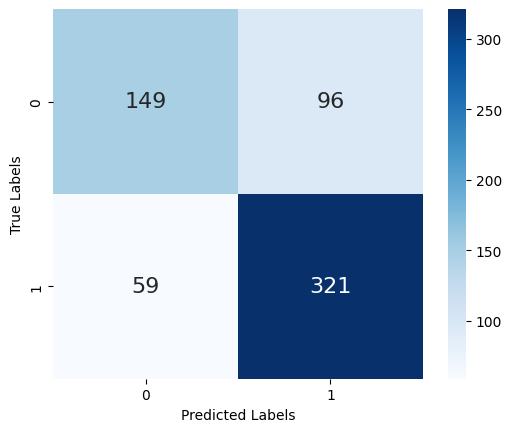

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels stored in y_true and predicted labels in y_pred

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_predict)

# Plot confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16}, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# y_true is the true binary labels, y_pred_prob is the predicted probabilities for the positive class
auc_roc = roc_auc_score(Y_test, Y_predict)
print(f"AUC-ROC score: {auc_roc}")

AUC-ROC score: 0.7264500537056927


logistic regression

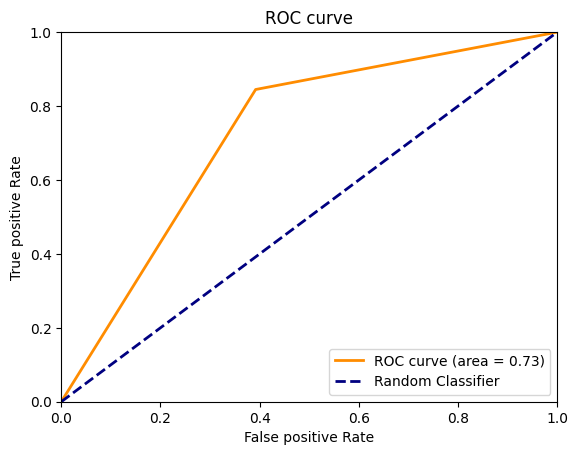

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted probabilities from your model stored in y_pred
# and true labels stored in y_true

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
# Define plot roc curve function
def plot_roc_curve(model, train, test):
    predictions = model.transform(test)
    predictions_train = model.transform(train)

    results = predictions.select(["probability", "label"])
    results_train = predictions_train.select(["probability", "label"])

    ## prepare score-label set
    results_collect = results.collect()
    results_list = [(float(i[0][0]), 1.0 - float(i[1])) for i in results_collect]

    results_collect_train = results_train.collect()
    results_list_train = [
        (float(i[0][0]), 1.0 - float(i[1])) for i in results_collect_train
    ]

    fpr = dict()
    fpr_train = dict()
    tpr = dict()
    tpr_train = dict()
    roc_auc = dict()
    roc_auc_train = dict()

    Y_test = [i[1] for i in results_list]
    Y_score = [i[0] for i in results_list]

    Y_train = [i[1] for i in results_list_train]
    Y_score_train = [i[0] for i in results_list_train]

    fpr, tpr, _ = roc_curve(Y_test, Y_score)
    roc_auc = auc(fpr, tpr)

    fpr_train, tpr_train, _ = roc_curve(Y_train, Y_score_train)
    roc_auc_train = auc(fpr_train, tpr_train)

    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve on testing set (area = %0.2f)" % roc_auc)
    plt.plot(
        fpr_train,
        tpr_train,
        label="ROC curve on training set (area = %0.2f)" % roc_auc_train,
    )
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Assuming you have predicted labels from your model stored in y_pred
# and true labels stored in y_true

# Compute balanced accuracy
balanced_acc = balanced_accuracy_score(Y_test, Y_predict)
print(f"Balanced accuracy score: {balanced_acc}")


Balanced accuracy score: 0.7264500537056928


In [ ]:
from sklearn.metrics import matthews_corrcoef

# y_true is the true binary labels, y_pred is the predicted binary labels
mcc = matthews_corrcoef(Y_test, Y_predict)
print(f"Matthew's correlation coefficient: {mcc}")


Matthew's correlation coefficient: 0.46922113879429617


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test is the true labels and y_predict is the predicted labels
accuracy = accuracy_score(Y_test, Y_predict)
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.752


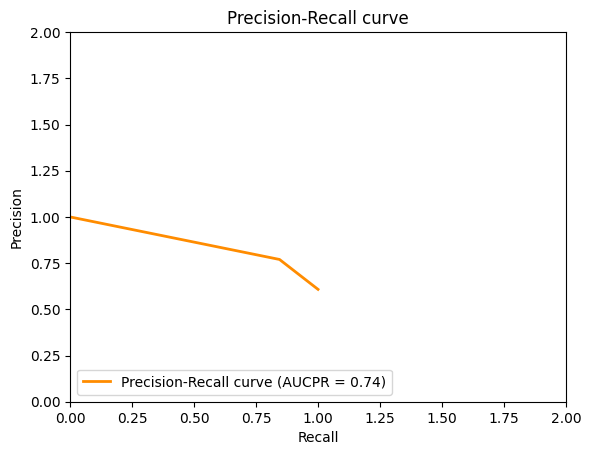

In [ ]:


from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have predicted probabilities from your model stored in y_pred
# and true labels stored in y_true

# Compute precision-recall curve and AUCPR score
precision, recall, _ = precision_recall_curve(Y_test, Y_predict)
aucpr = average_precision_score(Y_test, Y_predict)

# Plot precision-recall curve
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUCPR = %0.2f)' % aucpr)
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 2.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

[04:55:48] WARNING: ../src/learner.cc:767: 
Parameters: { "iterations", "random_seed" } are not used.



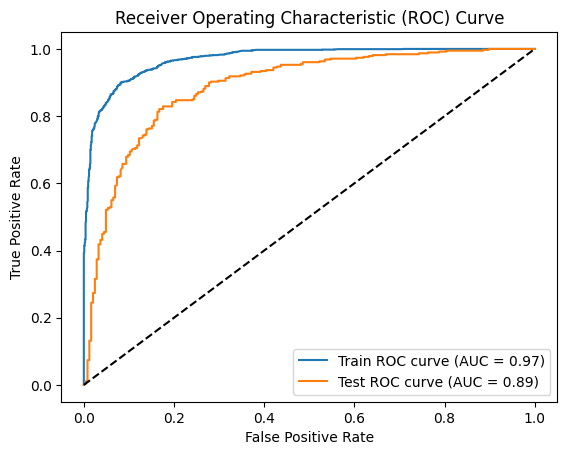

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the CatBoost classifier
model = XGBClassifier(iterations=100, learning_rate=0.1, random_seed=42)

# Fit the model to the training data
model.fit(X_train, Y_train, verbose=False)

# Get predicted probabilities for both training and testing data
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_train_proba)
auc_train = roc_auc_score(Y_train, y_train_proba)

# Calculate ROC curve and AUC for testing data
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_test_proba)
auc_test = roc_auc_score(Y_test, y_test_proba)

# Plot ROC curve for training and testing data
plt.plot(fpr_train, tpr_train, label='Train ROC curve (AUC = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (AUC = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()